# Assignment 2

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# read data set
ransomware_data = pd.read_csv("dataset_ransomware.csv", sep=',', parse_dates=True, header=8, encoding = "ISO-8859-1")
ransomware_data.head(20)

,# Firstseen (UTC),Threat,Malware,Host,URL,Status,Registrar,IP address(es),ASN(s),Country
0,2018-08-12 00:46:13,C2,Locky,83.217.11.193,http://83.217.11.193/linuxsucks.php,offline,NaN,83.217.11.193,199669,RU
1,2018-08-10 05:43:15,C2,Locky,pagaldaily.com,http://pagaldaily.com/apache_handler.php,offline,Danesco Trading Ltd.,185.82.217.102,59729,BG
2,2018-08-10 05:43:15,C2,Locky,185.82.217.102,http://185.82.217.102/apache_handler.php,offline,NaN,185.82.217.102,59729,BG
3,2018-08-09 16:50:50,C2,Locky,91.226.92.204,http://91.226.92.204/checkupdate,offline,NaN,91.226.92.204,12389,RU
4,2018-08-09 07:16:22,C2,Locky,80.87.202.49,http://80.87.202.49/information.cgi,offline,NaN,80.87.202.49,29182,RU
5,2018-08-08 21:07:16,C2,Locky,217.12.199.244,http://217.12.199.244/apache_handler.php,offline,NaN,217.12.199.244,15626,UA
6,2018-08-03 20:44:38,C2,Locky,www.1axb.com,http://www.1axb.com/main.php,online,"GoDaddy.com, LLC",109.248.222.50,57494,RU
7,2018-08-02 19:02:22,C2,Locky,176.31.127.168,http://176.31.127.168/checkupdate,offline,NaN,176.31.127.168,16276,FR
8,2018-08-02 12:40:27,C2,Locky,5.39.76.12,http://5.39.76.12/main.php,offline,NaN,5.39.76.12,16276,FR
9,2018-08-02 12:40:27,C2,Locky,195.123.209.122,http://195.123.209.122/main.php,online,NaN,195.123.209.122,50979,LV


In [2]:
# Check registrars in the data set
ransomware_data["Registrar"] = ransomware_data["Registrar"].str.lower()
ransomware_data["Registrar"].value_counts()

eranet international limited                                                 1515
godaddy.com, llc                                                             1376
key-systems gmbh                                                              699
enom, inc.                                                                    525
pdr ltd. d/b/a publicdomainregistry.com                                       484
tucows domains inc.                                                           395
paknic (private) limited                                                      365
web commerce communications limited dba webnic.cc                             241
ru-center-ru                                                                  184
hichina zhicheng technology ltd.                                              166
ascio technologies, inc. danmark - filial af ascio technologies, inc. usa     160
onlinenic, inc.                                                               154
regru-ru        

In [3]:
# for top 20, we got registrar size (retrieved at 30-09-2018)
# we check per registrar what the percentage is of infected domains
top20size = [103604, 59041960, 1497176, 6875402, 5158744, 10029986, 
             4733, 331137, 337296, 7576711, 1592955, 701508, 426805, 
             474077, 145975, 7030561, 11838, 564821, 626271, 2326719]
total = np.sum(top20size)
top20 = ransomware_data["Registrar"].value_counts()[:20]
percentage_infected = top20/top20size
percentage_infected = percentage_infected.sort_values(ascending=False)
percentage_infected

paknic (private) limited                                                     0.077118
eranet international limited                                                 0.014623
r01-ru                                                                       0.011235
instra corporation pty, ltd.                                                 0.001000
web commerce communications limited dba webnic.cc                            0.000728
ru-center-ru                                                                 0.000546
key-systems gmbh                                                             0.000467
regru-ru                                                                     0.000356
alpnames limited                                                             0.000312
onlinenic, inc.                                                              0.000220
ici - rotld                                                                  0.000209
tiscalidomain-reg                                     

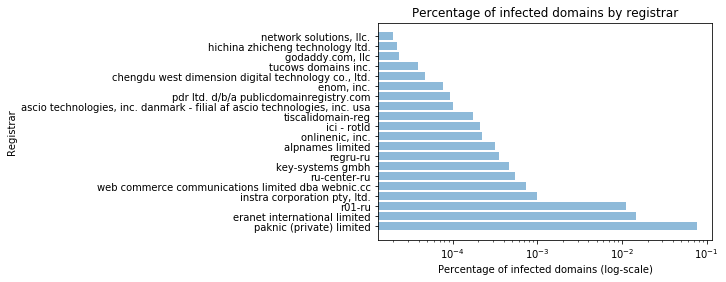

In [5]:
# create bar chart
labels = ['paknic (private) limited', 'eranet international limited', 'r01-ru',
        'instra corporation pty, ltd.',
        'web commerce communications limited dba webnic.cc', 'ru-center-ru',
        'key-systems gmbh', 'regru-ru', 'alpnames limited', 'onlinenic, inc.',
        'ici - rotld', 'tiscalidomain-reg',
        'ascio technologies, inc. danmark - filial af ascio technologies, inc. usa',
        'pdr ltd. d/b/a publicdomainregistry.com', 'enom, inc.',
        'chengdu west dimension digital technology co., ltd.',
        'tucows domains inc.', 'godaddy.com, llc',
        'hichina zhicheng technology ltd.', 'network solutions, llc.']
plt.barh(labels, percentage_infected.values, align='center', alpha=0.5, log=True)
plt.ylabel('Registrar')
plt.xlabel("Percentage of infected domains (log-scale)")
plt.title('Percentage of infected domains by registrar') 
plt.savefig('barchart.png')

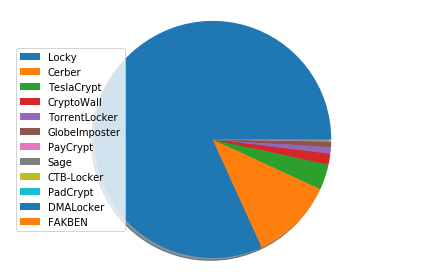

In [7]:
# check the different types of malware
malware_counts = ransomware_data["Malware"].value_counts()
total = np.sum(malware_counts)
malware_counts = malware_counts/total

labels = ['Locky', 'Cerber', 'TeslaCrypt', 'CryptoWall', 'TorrentLocker',
        'GlobeImposter', 'PayCrypt', 'Sage', 'CTB-Locker', 'PadCrypt',
        'DMALocker', 'FAKBEN']
# create pie chart to see share of malware types used
patches, texts = plt.pie(malware_counts, shadow=True)
plt.legend(patches, labels, loc="center left")
plt.axis('equal')
plt.tight_layout()
plt.savefig('piechart.png')